## DSC478 Winter 2019
## Amy Aumpansub
## Due Date: Jan 29th, 2019


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
#Change directorty working and import data
os.chdir('C:/Users/Amy/Desktop/dsc478/assignment')

In [3]:
#Import bank data
bankTable = pd.read_csv("bank_data.csv")

In [4]:
bankTable.shape

(600, 12)

## Question 1: Explore the general characteristics of the data as a whole: examine the means, standard deviations, and other statistics associated with the numerical attributes; show the distributions of values associated with categorical attributes; etc.

In [5]:
#Check the imported data 
bankTable.head(5)

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [6]:
#Check type of features
bankTable.dtypes

id               object
age               int64
income          float64
children          int64
gender           object
region           object
married          object
car              object
savings_acct     object
current_acct     object
mortgage         object
pep              object
dtype: object

In [7]:
#Descriptive statistics for 3 numeric variables
bankTable.describe()

,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


**There are 3 Numeric Attributes: age, income, and children**
- The statistics are shown above. The range of ages is 18 - 67 years old. The age has the mean of 42.39 years which are closed to the median of 42 years. The standard deviation of age is 14.42 years.
- The income ranges from 63130.10 (max) to 5014.21 (min). The income has the greater mean of 27524.03 than the median of 24925.30. The distribution will be right-skewed if the mean is greater than the median and the mode, so we will further examine the histogram of income in question 9. The standard deviation of income is 12899.46.
- The range of children is 0 to 3 children. The children has the mean of 1.011 closed to the median of 1. The standard deviation of children is 1.056 We will further examine the distribution from the histogram in the later part (question 9).

**Grouping the numberic variables by category**

In [8]:
bankTable.groupby("gender").mean()

,age,income,children
gender,,,
FEMALE,43.693333,27831.368233,1.026667
MALE,41.096667,27216.694200,0.996667


- When grouping the numeric variables by gender, the female customers tend to have higher averaged age and income and a greater number of children.

In [9]:
bankTable.groupby("region").mean()

,age,income,children
region,,,
INNER_CITY,41.992565,26843.999963,0.951673
RURAL,43.010417,30027.605417,1.229167
SUBURBAN,43.725806,28656.356935,0.967742
TOWN,42.202312,26786.349653,1.000000


- When grouping the numeric variables by region, we can see some implications. Comparing to other areas, the customers from rural area tend to have higher averaged income, and greater number of children.
- The sububan customers has the highest averaged age and the inner city customers has the lowest averaged age, implying that younger people tend to live in the inner city.
- For income, the rural customers have the highest averaged income and the town customers has the lowest averaged income.
- For children,the rural customers have the highest averaged children and the inner city customers has the lowest averaged children, implying that people in rural area tend to have more children.

In [10]:
bankTable.groupby("married").mean()

,age,income,children
married,,,
NO,42.186275,27674.627108,1.083333
YES,42.502525,27446.451515,0.974747


- When grouping by marriage status, the married customers tend to have higher averaged age, lower income and lower number of children.

In [11]:
bankTable.groupby("car").mean()

,age,income,children
car,,,
NO,41.289474,26486.807336,0.973684
YES,43.530405,28589.288176,1.050676


- When grouping by car, the customers who own car tend to have higher averaged age and income and greater number of children.

In [12]:
bankTable.groupby("savings_acct").mean()

,age,income,children
savings_acct,,,
NO,38.430108,22405.999194,0.946237
YES,44.176329,29823.436908,1.041063


- When grouping by saving account , the customers have saving accounts tend to have higher averaged age and income and greater number of children. 

In [13]:
bankTable.groupby("current_acct").mean()

,age,income,children
current_acct,,,
NO,43.296552,26802.195655,1.000000
YES,42.107692,27754.066725,1.015385


- For current account, the customers who have current accounts have slightly higher averaged income and slightly greater number of children. However, the customers who do not have current accounts have slightly higher averaged age

In [14]:
bankTable.groupby("mortgage").mean()

,age,income,children
mortgage,,,
NO,42.565217,27662.194680,1.069054
YES,42.076555,27265.553158,0.904306


- When grouping by mortgage , the customers who have and do not mortgage tend to have similar averaged age, income and, number of children.

In [15]:
bankTable.groupby("pep").mean()

,age,income,children
pep,,,
NO,40.098160,24900.953374,1.067485
YES,45.127737,30644.919453,0.945255


- The customers who purchased the PEP product tend to have a higher averaged age and income, but lower number of childeren. 

**There are 8 Categorical Attributes: gender, region, married, car, save_acct, current_acct, mortgage, and pep**

### Distribution of 8 categorical variables

In [16]:
temp1 = bankTable["gender"].value_counts()
temp1

FEMALE    300
MALE      300
Name: gender, dtype: int64

In [17]:
temp2 = bankTable["region"].value_counts()
temp2

INNER_CITY    269
TOWN          173
RURAL          96
SUBURBAN       62
Name: region, dtype: int64

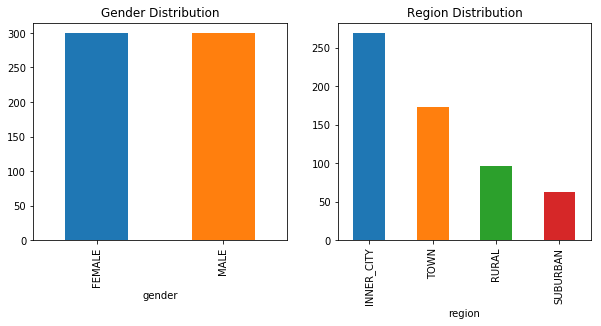

In [18]:
#Create bar chart for categorical variables
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('gender')
ax1.set_title("Gender Distribution")
temp1.plot(kind='bar', grid = False)

ax1 = fig.add_subplot(122)
ax1.set_xlabel('region')
ax1.set_title("Region Distribution")
temp2.plot(kind='bar', grid = False)

- There are an equal number of female and male customers (300 female and 300 male customers).
- The majority of customers (269 customers) are in the inner-city region accounting for about 44.8% of total customers.
- The minority of customers (62 customers) live in the suburban region accounting for about 10.3% of total customers.

In [19]:
temp3 = bankTable["married"].value_counts()
temp3

YES    396
NO     204
Name: married, dtype: int64

In [20]:
temp4 = bankTable["car"].value_counts()
temp4

NO     304
YES    296
Name: car, dtype: int64

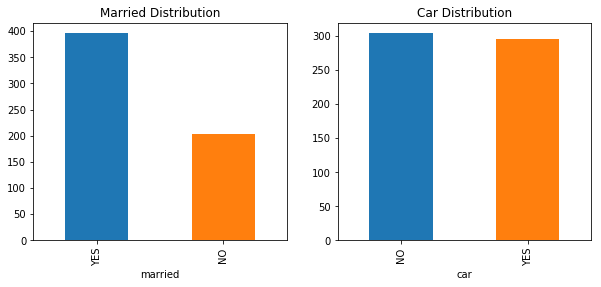

In [21]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('married')
ax1.set_title("Married Distribution")
temp3.plot(kind='bar', grid = False)

ax1 = fig.add_subplot(122)
ax1.set_xlabel('car')
ax1.set_title("Car Distribution")
temp4.plot(kind='bar', grid = False)


- The 66% of bank customers (396 of 600 customers) are married.
- There are 296 customers or 49.3% of total customers own cars.

In [22]:
temp5 = bankTable["savings_acct"].value_counts()
temp5

YES    414
NO     186
Name: savings_acct, dtype: int64

In [23]:
temp6 = bankTable["current_acct"].value_counts()
temp6

YES    455
NO     145
Name: current_acct, dtype: int64

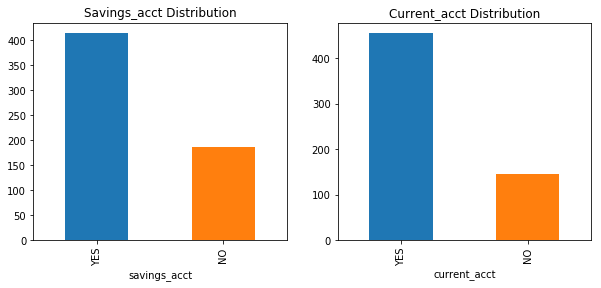

In [24]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('savings_acct')
ax1.set_title("Savings_acct Distribution")
temp5.plot(kind='bar', grid = False)

ax1 = fig.add_subplot(122)
ax1.set_xlabel('current_acct')
ax1.set_title("Current_acct Distribution")
temp6.plot(kind='bar', grid = False)

- The majority of bank customers have saving accounts and current accounts.
- The 69% of bank customers have saving account and 75.8% of bank customers have current checking account.

In [25]:
temp7 = bankTable["mortgage"].value_counts()
temp7

NO     391
YES    209
Name: mortgage, dtype: int64

In [26]:
temp8 = bankTable["pep"].value_counts()
temp8

NO     326
YES    274
Name: pep, dtype: int64

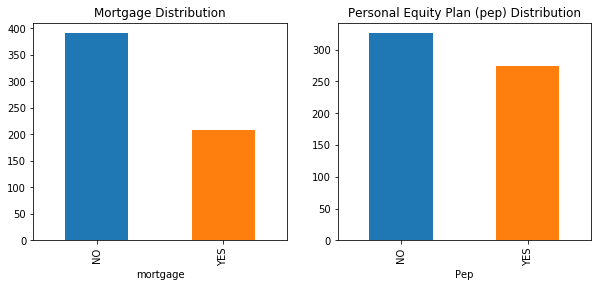

In [27]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('mortgage')
ax1.set_title("Mortgage Distribution")
temp7.plot(kind='bar', grid = False)

ax1 = fig.add_subplot(122)
ax1.set_xlabel('Pep')
ax1.set_title("Personal Equity Plan (pep) Distribution")
temp8.plot(kind='bar', grid = False)

- There are the greater number of customers who did not purchase pep and did not have a mortgage.

## Question 2:  Suppose that the hypothetical bank is particularly interested in customers who buy the PEP (Personal Equity Plan) product. Compare and contrast the subsets of customers who buy and don't buy the PEP. Compute summaries (as in part 1) of the selected data with respect to all other attributes. Can you observe any significant differences between these segments of customers? Discuss your observations.

In [28]:
#Examine customers who purchased PEP with numberic variables
temp9 = bankTable.groupby("pep").describe()
temp9
temp9.stack()

age    children        income
pep                                            
NO  count  326.000000  326.000000    326.000000
    mean    40.098160    1.067485  24900.953374
    std     14.123506    1.195524  11661.123422
    min     18.000000    0.000000   5014.210000
    25%     27.000000    0.000000  15366.475000
    50%     40.000000    0.000000  23105.000000
    75%     51.000000    2.000000  31210.900000
    max     67.000000    3.000000  61554.600000
YES count  274.000000  274.000000    274.000000
    mean    45.127737    0.945255  30644.919453
    std     14.327991    0.860571  13609.613043
    min     18.000000    0.000000   7756.360000
    25%     34.000000    0.000000  19639.475000
    50%     45.000000    1.000000  28080.050000
    75%     58.000000    1.000000  38458.350000
    max     67.000000    3.000000  63130.100000

In [29]:
bankTable.groupby("pep").mean()

,age,income,children
pep,,,
NO,40.098160,24900.953374,1.067485
YES,45.127737,30644.919453,0.945255


**From the output above**
- There are greater number of customers who didn't purchase PEP product or about 54% of total bank customers.
- Comparing to the customers who didn't purchase PEP product, the customers who purchased PEP product have a higher avaraged age (45.12 years old), a higher averaged income (30,644.91), but a lower averaged number of children (0.94).

In [30]:
#Examine customers who purchased PEP with categorical variables
gg = pd.crosstab(bankTable["pep"], bankTable["gender"])
gg

gender,FEMALE,MALE
pep,,
NO,170,156
YES,130,144


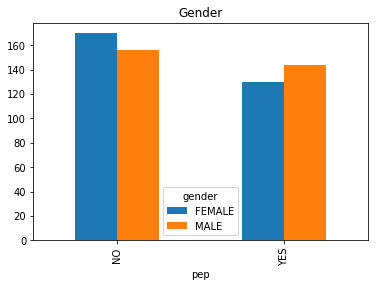

In [31]:
#Plot graph between gender and pep products
plt.show(gg.plot(kind="bar", title="Gender"))

- There are more male customers who purchased PEP products than female customers.

In [32]:
#Plot graph between region and pep products
gg = pd.crosstab(bankTable["pep"], bankTable["region"])
gg

region,INNER_CITY,RURAL,SUBURBAN,TOWN
pep,,,,
NO,146,50,28,102
YES,123,46,34,71


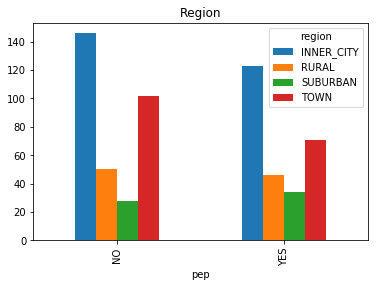

In [33]:
plt.show(gg.plot(kind="bar", title="Region"))

- The region graph shows similar trend regarding pep product. The majority of customers who purchased and did not purchase PEP products live in the inner city and town areas. 

In [34]:
#Plot graph between married and pep products
gg = pd.crosstab(bankTable["pep"], bankTable["married"])
gg

married,NO,YES
pep,,
NO,84,242
YES,120,154


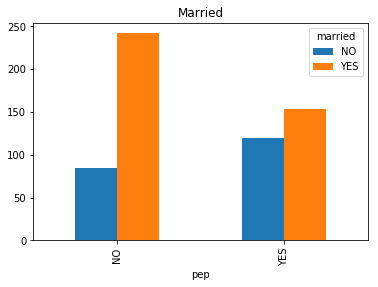

In [35]:
plt.show(gg.plot(kind="bar", title="Married"))

- The married graph shows similar trend regarding pep product. The majority of customers who purchased and did not purchase PEP products are married.

In [36]:
#Plot graph between car and pep products
gg = pd.crosstab(bankTable["pep"], bankTable["car"])
gg

car,NO,YES
pep,,
NO,168,158
YES,136,138


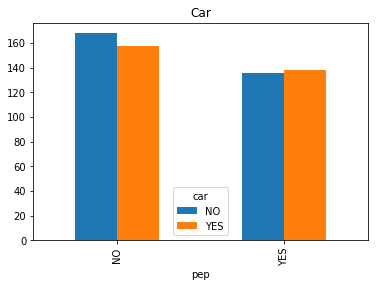

In [37]:
plt.show(gg.plot(kind="bar", title="Car"))

- The car graph shows that the number of customers who purchased pep products and owned cars is slightly higher. While the majority of customers who did not purchase PEP products also do not own cars.

In [38]:
#Plot graph between saving account and pep products
gg = pd.crosstab(bankTable["pep"], bankTable["savings_acct"])
gg

savings_acct,NO,YES
pep,,
NO,91,235
YES,95,179


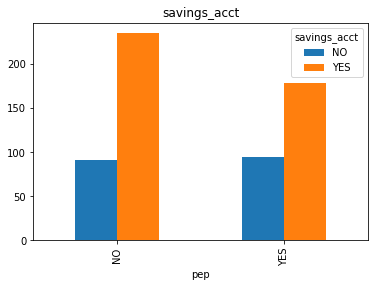

In [39]:
plt.show(gg.plot(kind="bar", title="savings_acct"))

- The saving account graph shows that the majority of customers who purchased and did not purchase the pep products both have saving accounts.

In [40]:
#Plot graph between current account and pep products
gg = pd.crosstab(bankTable["pep"], bankTable["current_acct"])
gg

current_acct,NO,YES
pep,,
NO,82,244
YES,63,211


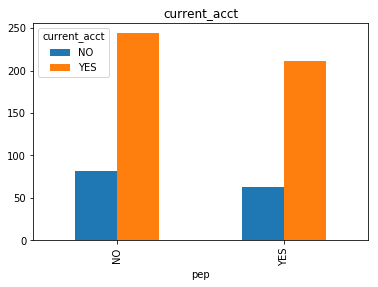

In [41]:
plt.show(gg.plot(kind="bar", title="current_acct"))

- The current account graph shows that the majority of customers who purchased and did not purchase the pep products both have current accounts.

In [42]:
#Plot graph between mortgage and pep products
gg = pd.crosstab(bankTable["pep"], bankTable["mortgage"])
gg

mortgage,NO,YES
pep,,
NO,209,117
YES,182,92


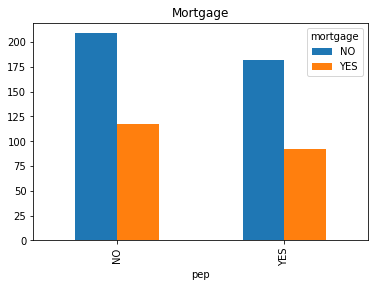

In [43]:
plt.show(gg.plot(kind="bar", title="Mortgage"))

- The Mortgage graph shows that the majority of customers who purchased and did not purchase the pep products both do not have mortgage.

**Summary for Question 2**
- There are greater number of customers who didn't purchase PEP product.
For numeric variables: Comparing to the customers who didn't purchase PEP product, the customers who purchased PEP product have a higher avaraged age (45.12 years old), a higher averaged income (30,644.91), but a lower averaged number of children (0.94).
- For categorical variables: the majority of customers who purchased the pep products are male, married, live in the inner city, have saving and current accounts, but do not have mortgage. The car graph shows that the majority of customers who purchased pep products has cars. 

## Question 3: Use z-score normalization to standardize the values of the income attribute. [Do not change the original income attribute in the table.]

In [44]:
#Normalize income variable using z-score
incomeZ = (bankTable["income"] - bankTable["income"].mean()) / bankTable["income"].std()
incomeZ

0     -0.773523
1      0.198541
2     -0.848766
3     -0.554180
4      1.787071
5      0.802015
6     -1.445560
7     -0.199809
8     -0.172079
9     -0.256749
10     2.502419
11    -0.067075
12    -0.913854
13     2.145877
14    -0.624013
15    -0.401717
16    -0.759274
17     1.045932
18    -0.047663
19    -0.387708
20     2.353327
21    -0.854821
22     0.846746
23    -0.929126
24    -1.153825
25     1.047328
26    -0.520512
27    -0.574445
28     0.142259
29    -0.252253
         ...   
570    0.476102
571    0.669963
572    0.014642
573   -0.397174
574    0.073326
575    0.229774
576   -0.648378
577    1.381334
578   -1.645790
579   -0.185770
580    1.888083
581   -1.153469
582   -0.429446
583    0.121638
584   -0.309752
585   -1.395958
586   -0.710039
587    0.290692
588    1.717092
589   -1.155135
590   -0.287255
591    0.306204
592   -0.562506
593    1.852244
594    0.267280
595    1.511765
596   -1.383916
597   -0.895210
598   -0.993237
599   -0.066083
Name: income, Length: 60

## Question 4:  Discretize the age attribute into 3 categories (corresponding to "young", "mid-age", and "old"). [Do not change the original age attribute in the table.]

In [45]:
#Binning  the age attribute into 3 categories
ageBins = pd.qcut(bankTable.age, 3)
ageBins.head(5)

0      (35.0, 49.0]
1      (35.0, 49.0]
2      (49.0, 67.0]
3    (17.999, 35.0]
4      (49.0, 67.0]
Name: age, dtype: category
Categories (3, interval[float64]): [(17.999, 35.0] < (35.0, 49.0] < (49.0, 67.0]]

In [46]:
ageBins = pd.qcut(bankTable.age, [0, 0.33, 0.66, 1], labels=["young", "mid-age", "old"], retbins= True)
ageBins

(0      mid-age
 1      mid-age
 2          old
 3        young
 4          old
 5          old
 6        young
 7          old
 8      mid-age
 9          old
 10         old
 11         old
 12     mid-age
 13         old
 14     mid-age
 15     mid-age
 16     mid-age
 17     mid-age
 18         old
 19       young
 20         old
 21         old
 22         old
 23       young
 24       young
 25         old
 26     mid-age
 27     mid-age
 28     mid-age
 29         old
         ...   
 570    mid-age
 571    mid-age
 572      young
 573    mid-age
 574    mid-age
 575    mid-age
 576      young
 577        old
 578      young
 579    mid-age
 580        old
 581      young
 582    mid-age
 583    mid-age
 584      young
 585      young
 586      young
 587    mid-age
 588        old
 589      young
 590      young
 591    mid-age
 592    mid-age
 593        old
 594        old
 595        old
 596      young
 597      young
 598      young
 599    mid-age
 Name: age, Length: 600,

## Question 5:   Use Min-Max Normalization to transform the values of all numeric attributes (income, age, children) in the original table (before the transformations in parts 3 and 4 above) onto the range 0.0-1.0.

In [47]:
#Min-Max Normalization to transform numeric variables
bankTable[["age","income","children"]] = bankTable[["age","income","children"]].apply(lambda x: (x - x.min( )) / (x.max() - x.min()))
print (bankTable[["age","income","children"]].head (10))

        age    income  children
0  0.612245  0.215634  0.333333
1  0.448980  0.431395  1.000000
2  0.673469  0.198933  0.000000
3  0.102041  0.264320  1.000000
4  0.795918  0.783987  0.000000
5  0.795918  0.565343  0.666667
6  0.081633  0.066468  0.000000
7  0.816327  0.342977  0.000000
8  0.387755  0.349132  0.666667
9  0.734694  0.330338  0.666667


In [48]:
#Print min-max value after normalization
num_mins = bankTable[["age","income","children"]].min()
num_maxs = bankTable[["age","income","children"]].max()
print (num_mins,"\n",num_maxs)

age         0.0
income      0.0
children    0.0
dtype: float64 
 age         1.0
income      1.0
children    1.0
dtype: float64


**Min-Max Normalization**
- After Normalization, all values of age, income, and children attribute are in a range between 0 and 1.
- The max value is 1 and the min value is 0 as shown above.

## Question 6:  Convert the table (after normalization in part 5) into the standard spreadsheet format. Note that this requires converting each categorical attribute into multiple binary ("dummy") attributes Save this new table into a file called bank_numeric.csv and submit it along with your assignment.

In [49]:
bank_numeric  = pd.get_dummies(bankTable, columns = ["gender","region","married","car","savings_acct","current_acct","mortgage","pep"])
bank_numeric.head(5)

,id,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,...,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
0,ID12101,0.612245,0.215634,0.333333,1,0,1,0,0,0,...,1,0,1,0,1,0,1,0,0,1
1,ID12102,0.448980,0.431395,1.000000,0,1,0,0,0,1,...,0,1,1,0,0,1,0,1,1,0
2,ID12103,0.673469,0.198933,0.000000,1,0,1,0,0,0,...,0,1,0,1,0,1,1,0,1,0
3,ID12104,0.102041,0.264320,1.000000,1,0,0,0,0,1,...,1,0,1,0,0,1,1,0,1,0
4,ID12105,0.795918,0.783987,0.000000,1,0,0,1,0,0,...,1,0,0,1,1,0,1,0,1,0


In [50]:
bank_numeric.to_csv("bank_numeric.csv")

## Question 7:  Using the standardized data set (of the previous part), perform basic correlation analysis among the attributes. Discuss your results by indicating any significant positive or negative correlations among pairs of attributes. You need to construct a complete Correlation Matrix. Be sure to first remove the Customer ID column before creating the correlation matrix. [Hint:you can create the correlation matrix by using the corr() function in Pandas or corrcoef function in NumPy].

In [51]:
#Remove id column before calculating CORR
bank_numeric = bank_numeric.drop("id",1)
bank_numeric.head(5)

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,...,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
0,0.612245,0.215634,0.333333,1,0,1,0,0,0,1,...,1,0,1,0,1,0,1,0,0,1
1,0.448980,0.431395,1.000000,0,1,0,0,0,1,0,...,0,1,1,0,0,1,0,1,1,0
2,0.673469,0.198933,0.000000,1,0,1,0,0,0,0,...,0,1,0,1,0,1,1,0,1,0
3,0.102041,0.264320,1.000000,1,0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,1,0
4,0.795918,0.783987,0.000000,1,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,1,0


In [52]:
bank_numeric.corr()

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,...,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
age,1.000000,0.752726,0.023572,0.090081,-0.090081,-0.025171,0.018635,0.031345,-0.008510,-0.010394,...,-0.077733,0.077733,-0.184389,0.184389,0.035312,-0.035312,0.016154,-0.016154,-0.173825,0.173825
income,0.752726,1.000000,0.036761,0.023845,-0.023845,-0.047564,0.084776,0.029824,-0.036431,0.008386,...,-0.081556,0.081556,-0.266164,0.266164,-0.031616,0.031616,0.014662,-0.014662,-0.221991,0.221991
children,0.023572,0.036761,1.000000,0.014206,-0.014206,-0.051222,0.089902,-0.014122,-0.007033,0.048716,...,-0.036455,0.036455,-0.041536,0.041536,-0.006238,0.006238,0.074339,-0.074339,0.057663,-0.057663
gender_FEMALE,0.090081,0.023845,0.014206,1.000000,-1.000000,-0.023459,-0.009092,-0.010951,0.040472,0.021110,...,0.006667,-0.006667,0.007207,-0.007207,-0.019466,0.019466,0.066465,-0.066465,0.046843,-0.046843
gender_MALE,-0.090081,-0.023845,-0.014206,-1.000000,1.000000,0.023459,0.009092,0.010951,-0.040472,-0.021110,...,-0.006667,0.006667,-0.007207,0.007207,0.019466,-0.019466,-0.066465,0.066465,-0.046843,0.046843
region_INNER_CITY,-0.025171,-0.047564,-0.051222,-0.023459,0.023459,1.000000,-0.393444,-0.306032,-0.573814,-0.003254,...,0.018143,-0.018143,0.091373,-0.091373,-0.007894,0.007894,-0.002098,0.002098,-0.001054,0.001054
region_RURAL,0.018635,0.084776,0.089902,-0.009092,0.009092,-0.393444,1.000000,-0.148158,-0.277798,0.022649,...,-0.024006,0.024006,-0.036960,0.036960,0.008496,-0.008496,0.051908,-0.051908,-0.019714,0.019714
region_SUBURBAN,0.031345,0.029824,-0.014122,-0.010951,0.010951,-0.306032,-0.148158,1.000000,-0.216080,-0.012483,...,0.061184,-0.061184,-0.002605,0.002605,-0.038157,0.038157,-0.004635,0.004635,-0.062508,0.062508
region_TOWN,-0.008510,-0.036431,-0.007033,0.040472,-0.040472,-0.573814,-0.277798,-0.216080,1.000000,-0.006369,...,-0.041604,0.041604,-0.068654,0.068654,0.027431,-0.027431,-0.036591,0.036591,0.059115,-0.059115
married_NO,-0.010394,0.008386,0.048716,0.021110,-0.021110,-0.003254,0.022649,-0.012483,-0.006369,1.000000,...,-0.009571,0.009571,0.028604,-0.028604,-0.059996,0.059996,-0.021711,0.021711,-0.189578,0.189578


**Summary for Question 7**

From correlation matrix above, The correlation value of 0.75 between age and income variable indicates that they are positively and strongly correlated, which is a positive linear relationship. The income increases as age increases. the correlation coefficient values are more appropriate for intepreting numeric variables. All 3 numeric variables (age, income, children) have a postive linear association, but only age and income have a strong linear association. The correlation value of 0.023 between age and children variables shows a weak linear association. The correlation value of 0.036 between income and children variables shows they have a weak linear association. Thus, only the age and income variables show a strong positive linear relationship. (p = 0.75).

## Question 8 :   Using Matplotlib library and/or ploting capabilties of Pandas, create a scatter plot of the (non-normalized) Income attribute relative to Age. Be sure that your plot contains appropriate labels for the axes. Do these variables seem correlated?

In [53]:
#Import data
bankTable2= pd.read_csv("bank_data.csv") 

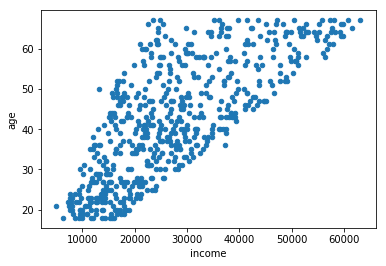

In [54]:
#Create Scatter Plot
bankTable2.plot(x="income", y="age", kind="scatter")

- As we can see that the relationship between the age and income show a significant positive (linear) relationship that when age is older the income will increase.

## Question 9: Create histograms for (non-normalized) Income (using 9 bins) and Age (using 15 bins).

Text(0.5, 0, 'Income')

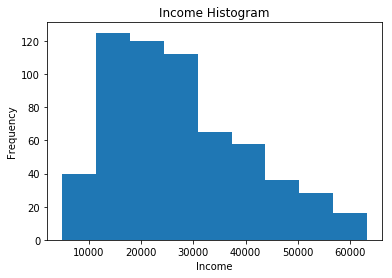

In [55]:
#Create Income histogram (using 9 bins)
income_hist = bankTable2["income"].plot(kind="hist", bins=9)
plt.title('Income Histogram')
plt.xlabel('Income')

- The income distribution is right-skewed, so most people have income less than the median and the mean or less than the avarage income of 27524.

Text(0.5, 0, 'Age')

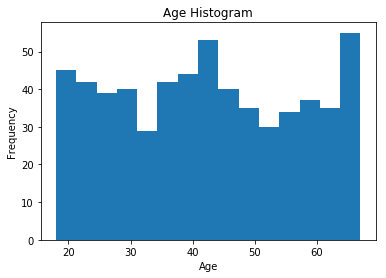

In [56]:
#Create Age histogram (using 15 bins)
age_hist = bankTable2["age"].plot(kind="hist", bins=15)
plt.title('Age Histogram')
plt.xlabel('Age')

- The histogram for age attribute shows that it has more than one peak. In other words, the age attribute is a multimodal distribution.

## Question 10:   Using a bar graph, plot the distribution of the values of the region attribute.¶

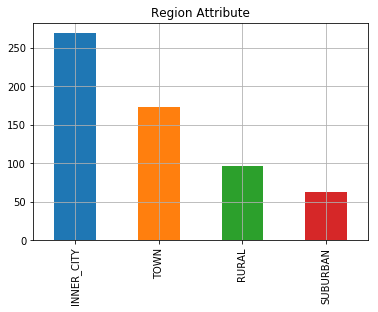

In [57]:
bankTable2["region"].value_counts().plot(kind='bar' ,grid= True, title="Region Attribute")

- The highest number of customers (269 customers) live in the inner-city region.
- The lowest number of customers (62 customers) live in the suburban region.

## Question 11:   Perform a cross-tabulation of the region attribute with the pep attribute. This requires the aggregation of the occurrences of each pep value (yes or no) separately for each value of the region attribute. Show the results as a 4 by 2 (region x pep) table with entries representing the counts. [Hint: you can either use Numpy or use aggregations functions in Pandas such as groupby() and cross-tab().] Then, either using Matplotlib directly or the plot() function in Pandas create a bar chart graph to visualize of the relationships between these sets of variables. [Hint: This example of creating simple bar charts using Matplotlib may be useful.]

In [58]:
rp = pd.crosstab(bankTable2["region"],bankTable2["pep"])

In [59]:
rp

pep,NO,YES
region,,
INNER_CITY,146,123
RURAL,50,46
SUBURBAN,28,34
TOWN,102,71


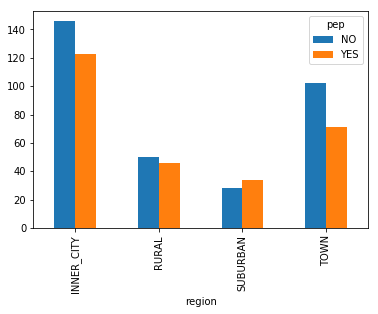

In [60]:
plt.show(rp.plot(kind="bar"))

- The bar chart above shows that only the suburban region has more customers purchasing the pep products.
- for the rural, town, and inner city regions, there are a greater number of customers who did not purchase the pep products.